# Aquiring the dataset and cleaning

## Imports

In [1]:
import pandas as pd
import sqlite3

In [99]:
#basics
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import random as random
from scipy import stats

## Importing the tables from DBeaver

In [4]:

con = sqlite3.connect("../../downloads/database.sqlite")
# df = pd.read_sql_query("SELECT * from surveys", con)

# # Verify that result of SQL query is stored in the dataframe
# print(df.head())

In [15]:
artists = pd.read_sql_query("SELECT * from artists", con)
artists.head(3)

,reviewid,artist
0,22703,massive attack
1,22721,krallice
2,22659,uranium club


In [6]:
content = pd.read_sql_query("SELECT * from content", con)

In [10]:
content.head(3)

,reviewid,content
0,22703,"“Trip-hop” eventually became a ’90s punchline,..."
1,22721,"Eight years, five albums, and two EPs in, the ..."
2,22659,Minneapolis’ Uranium Club seem to revel in bei...


In [8]:
genres = pd.read_sql_query("SELECT * from genres", con)

In [9]:
genres.head(3)

,reviewid,genre
0,22703,electronic
1,22721,metal
2,22659,rock


In [11]:
labels = pd.read_sql_query("SELECT * from labels", con)
labels.head(3)

,reviewid,label
0,22703,virgin
1,22721,hathenter
2,22659,static shock


In [12]:
reviews = pd.read_sql_query("SELECT * from reviews", con)
reviews.head(3)

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017


In [13]:
years = pd.read_sql_query("SELECT * from years", con)
years.head(3)

,reviewid,year
0,22703,1998.0
1,22721,2016.0
2,22659,2016.0


## Joining and cleaning the dataframes

In [16]:
df_cd = pd.merge(reviews, years, how='inner', on = 'reviewid')
df_cd.head(3)

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,1998.0
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,2016.0
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,2016.0


In [17]:
df = pd.merge(df_cd, genres, how='inner', on='reviewid')

In [148]:
df.head(3)

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,year,genre,label
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,1998.0,electronic,virgin
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,2016.0,metal,hathenter
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,2016.0,rock,static shock


In [20]:
df = pd.merge(df, labels, how='inner', on='reviewid')

In [45]:
df['author_type'].unique()

array(['contributor', 'associate reviews editor', 'tracks coordinator',
       'associate staff writer', 'contributing editor',
       'senior staff writer', 'assistant editor', 'associate editor',
       'senior editor', 'executive editor', None, 'deputy news editor',
       'associate features editor', 'managing editor', 'editor-in-chief',
       'news director'], dtype=object)

In [52]:
df['author_type'].fillna('contributor', inplace=True)

In [55]:
df.dropna(inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22680 entries, 0 to 25920
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewid        22680 non-null  int64  
 1   title           22680 non-null  object 
 2   artist          22680 non-null  object 
 3   url             22680 non-null  object 
 4   score           22680 non-null  float64
 5   best_new_music  22680 non-null  int64  
 6   author          22680 non-null  object 
 7   author_type     22680 non-null  object 
 8   pub_date        22680 non-null  object 
 9   pub_weekday     22680 non-null  int64  
 10  pub_day         22680 non-null  int64  
 11  pub_month       22680 non-null  int64  
 12  pub_year        22680 non-null  int64  
 13  year            22680 non-null  float64
 14  genre           22680 non-null  object 
 15  label           22680 non-null  object 
dtypes: float64(2), int64(6), object(8)
memory usage: 2.9+ MB


# Exploratory Analysis

## What are the best reviewed genres?

In [192]:
genre_df = df.groupby(by=['genre'], as_index=True).agg(
    {'score': "mean", 'reviewid': 'count', 'best_new_music': 'sum'}).rename(columns={'reviewid':'count'}).reset_index().sort_values(
        'score', ascending=False)

In [193]:
genre_df = genre_df[['genre', 'score', 'count', 'best_new_music']]

In [194]:
genre_df['score'] = genre_df['score'].round(2)

In [198]:
genre_df['percentage_best_new'] = (genre_df['best_new_music']/ genre_df['count']).round(2)

In [200]:
genre_df

,genre,score,count,best_new_music,percentage_best_new
3,global,7.42,263,12,0.05
1,experimental,7.38,2010,158,0.08
4,jazz,7.36,471,24,0.05
2,folk/country,7.22,749,31,0.04
8,rock,7.00,10571,737,0.07
5,metal,6.99,944,31,0.03
0,electronic,6.94,4210,243,0.06
6,pop/r&b,6.93,1628,124,0.08
7,rap,6.89,1834,109,0.06


/Users/isabellaredford/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='genre', ylabel='score'>

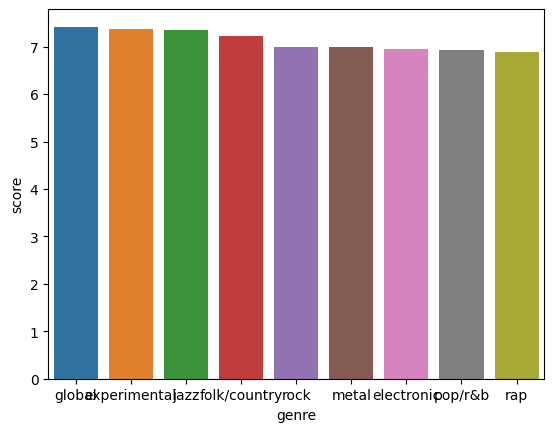

In [184]:
sns.barplot('genre', 'score', data=genre_df)

/Users/isabellaredford/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


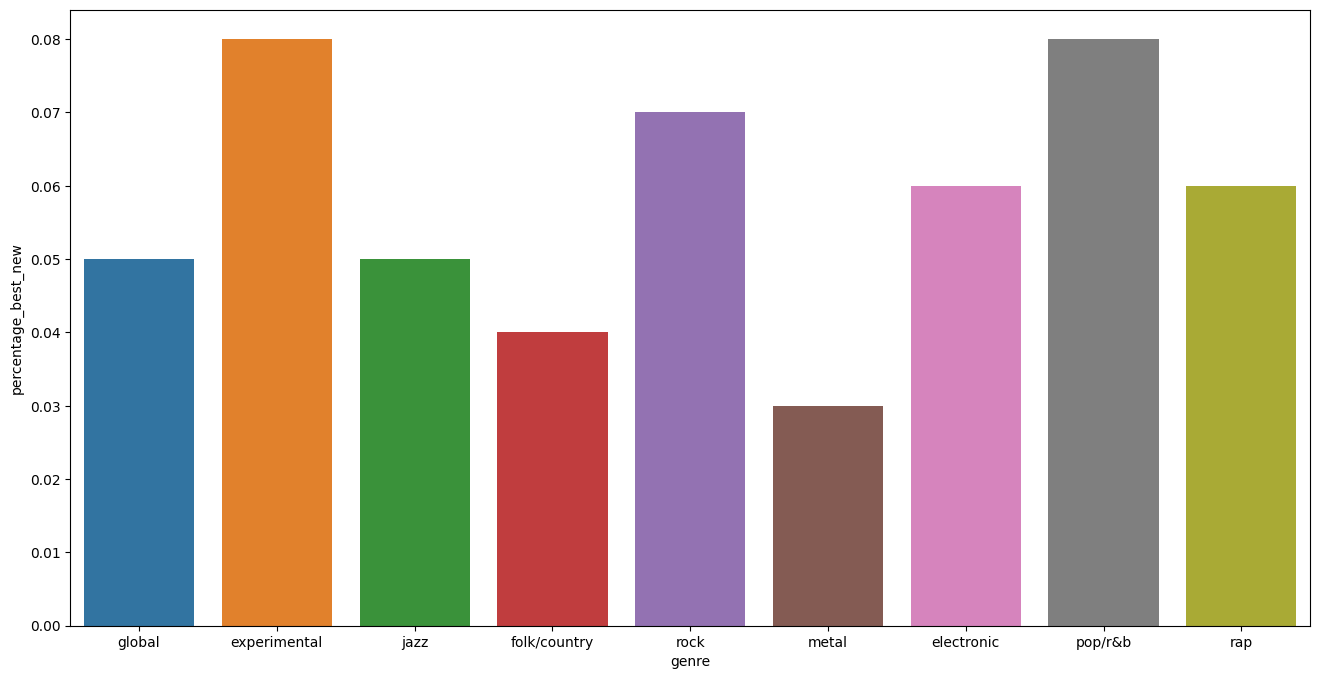

In [203]:
plt.figure(figsize=(16,8))
sns.barplot('genre', 'percentage_best_new', data=genre_df);

## What are the best reviewed labels

In [213]:
label_df = df.groupby(by=['label'], as_index=True).agg(
    {'score': "mean", 'reviewid': 'count', 'best_new_music': 'sum'}).rename(columns={'reviewid':'count'}).reset_index().sort_values(
        'count', ascending=False)

In [214]:
label_df_slim = label_df[label_df['count']>150]

In [215]:
label_df_slim['score'] = label_df_slim['score'].round(2)

/var/folders/xc/5fgj99cd6fvdfy11d_h89ngh0000gn/T/ipykernel_63337/4186422213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_df_slim['score'] = label_df_slim['score'].round(2)


In [216]:
label_df_slim = label_df_slim.sort_values('score', ascending=False)

In [217]:
label_df_slim.reset_index(drop=True, inplace=True)

In [218]:
label_df_slim['percentage_best_new'] = (label_df_slim['best_new_music']/ label_df_slim['count']).round(2)

In [220]:
label_df_slim.sort_values('percentage_best_new', ascending=False)

,label,score,count,best_new_music,percentage_best_new
2,domino,7.38,283,47,0.17
9,mute,7.00,236,36,0.15
0,matador,7.44,209,27,0.13
6,sub pop,7.19,312,39,0.12
1,kranky,7.39,157,18,0.11
15,interscope,6.49,167,16,0.10
7,warp,7.11,226,23,0.10
13,capitol,6.56,153,16,0.10
3,merge,7.34,260,24,0.09
5,jagjaguwar,7.25,169,15,0.09


/Users/isabellaredford/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='percentage_best_new'>

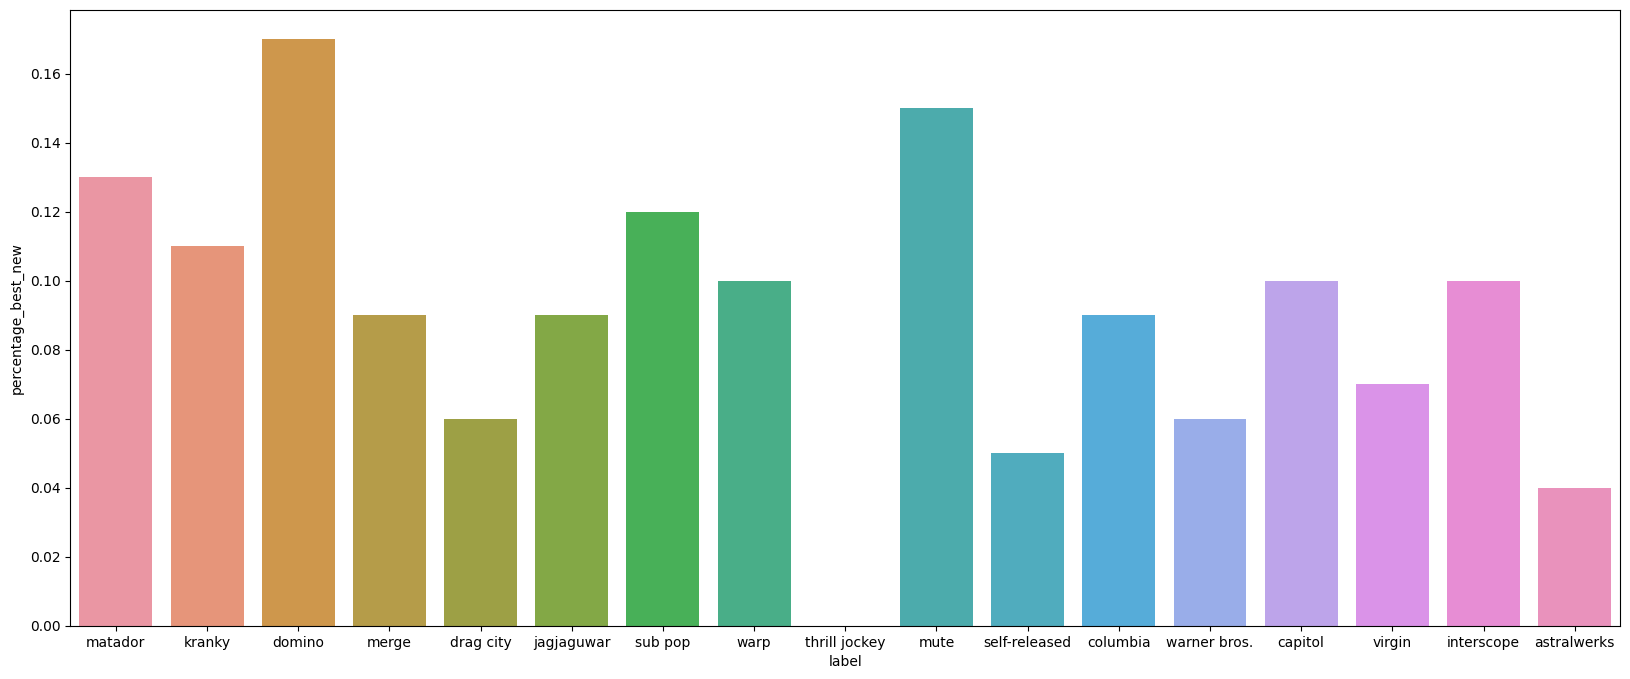

In [221]:
plt.figure(figsize=(20,8))
sns.barplot('label', 'percentage_best_new', data=label_df_slim)

/Users/isabellaredford/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='score'>

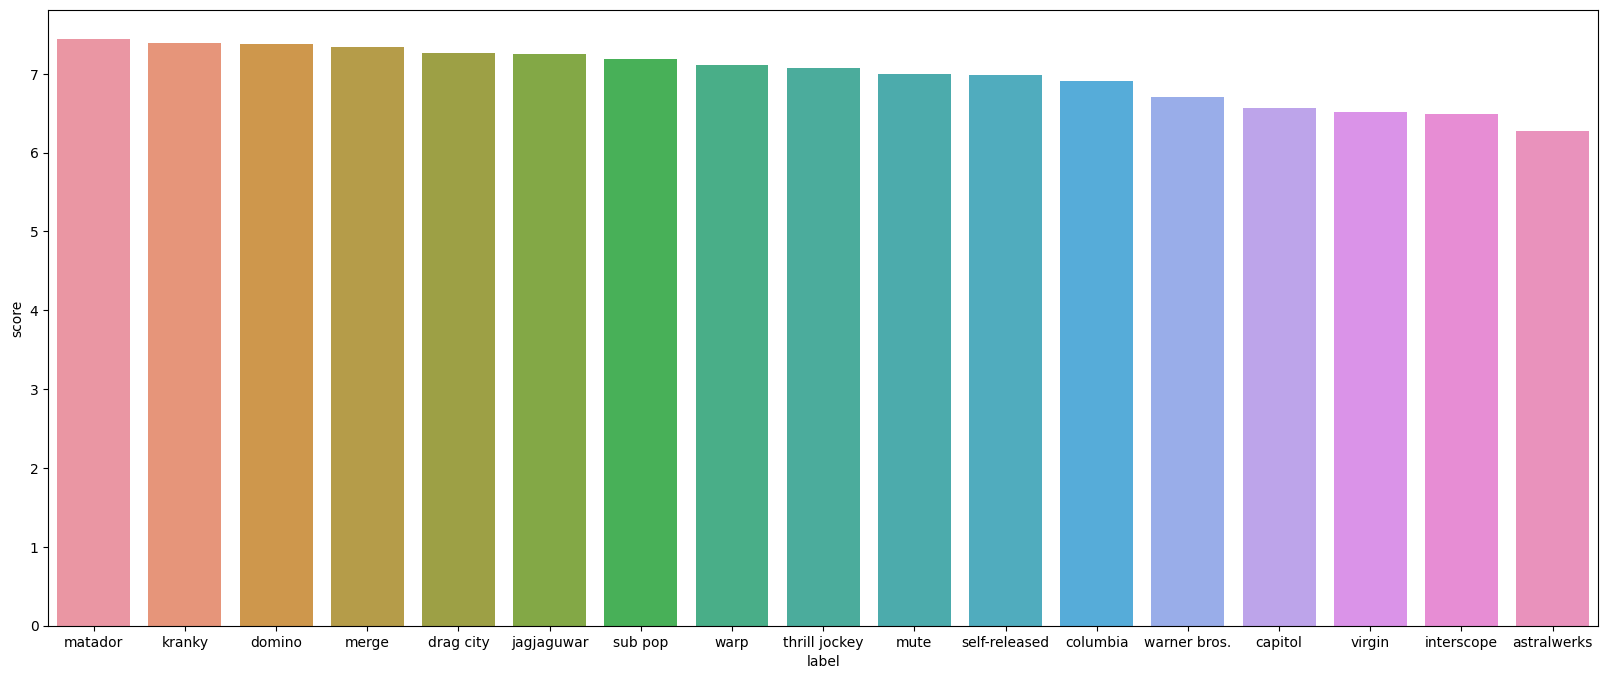

In [210]:
plt.figure(figsize=(20,8))
sns.barplot('label', 'score', data=label_df_slim)

## What is the best day of the week?

In [224]:
day_df = df.groupby(by=['pub_weekday'], as_index=True).agg(
    {'score': "mean", 'reviewid': 'count', 'best_new_music': 'sum'}).rename(columns={'reviewid':'count'}).reset_index().sort_values(
        'score', ascending=False)

In [225]:
day_df

,pub_weekday,score,count,best_new_music
5,5,7.428947,228,12
4,4,7.081973,3162,269
0,0,7.025718,4390,321
1,1,7.025259,4830,319
6,6,7.018454,1268,36
3,3,7.008523,4388,282
2,2,6.992728,4414,230


In [226]:
day_df['percentage_best_new'] = (day_df['best_new_music']/ day_df['count']).round(2)

In [228]:
day_df.sort_values('percentage_best_new', ascending=False)

,pub_weekday,score,count,best_new_music,percentage_best_new
4,4,7.081973,3162,269,0.09
0,0,7.025718,4390,321,0.07
1,1,7.025259,4830,319,0.07
3,3,7.008523,4388,282,0.06
5,5,7.428947,228,12,0.05
2,2,6.992728,4414,230,0.05
6,6,7.018454,1268,36,0.03


## A look at Review Content

In [238]:
content['content'][2]

'Minneapolis’ Uranium Club seem to revel in being aggressively obtuse. They sprung up last year with their Human Exploration EP, an eight-song tape of some of the most tightly-wound, gleefully mean, and well-constructed punk to grace the underground in a while. Human Exploration quickly became a must-have of the punk scene, receiving multiple vinyl pressings, all while the band rejected any web presence and most interviews as well.All of Them Naturals, their second EP, is Uranium Club indulging even more in such pranksterish qualities. The first two minutes of audio are pulled from the Nation of Ulysses handbook of sarcasm and myth-making, as a man with a vaguely British accent comments fictitiously on all the band has supposedly accomplished since its last record, from selling novelty pencils to distributing pamphlets for “pseudo-intellectual literature circles and swingers’ parties.” Uranium Club must know that people have been patiently waiting to hear more from them, and the final 

In [230]:
df_content = pd.merge(df, content, how='inner', on='reviewid')

In [233]:
df_content.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22728 entries, 0 to 22727
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewid        22728 non-null  int64  
 1   title           22728 non-null  object 
 2   artist          22728 non-null  object 
 3   url             22728 non-null  object 
 4   score           22728 non-null  float64
 5   best_new_music  22728 non-null  int64  
 6   author          22728 non-null  object 
 7   author_type     22728 non-null  object 
 8   pub_date        22728 non-null  object 
 9   pub_weekday     22728 non-null  int64  
 10  pub_day         22728 non-null  int64  
 11  pub_month       22728 non-null  int64  
 12  pub_year        22728 non-null  int64  
 13  year            22728 non-null  float64
 14  genre           22728 non-null  object 
 15  label           22728 non-null  object 
 16  content         22728 non-null  object 
dtypes: float64(2), int64(6), object